In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
airpass=pd.read_csv(r"F:\r studio\python\AirPassengers.csv")

In [3]:
airpass.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
airpass.shape

(144, 2)

In [5]:
airpass.Month=pd.to_datetime(airpass.Month,infer_datetime_format=True)

In [6]:
ind_airpass=airpass.set_index(['Month'])

In [7]:
airpass.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
from datetime import datetime

In [9]:
%matplotlib inline

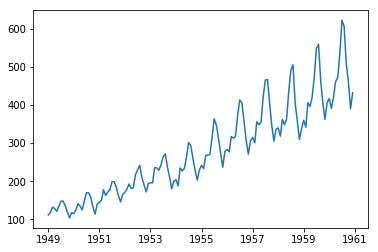

In [10]:
plt.plot(ind_airpass)

In [11]:
level1_diff=ind_airpass.Passengers.diff()

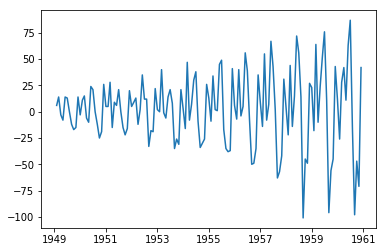

In [12]:
plt.plot(level1_diff)

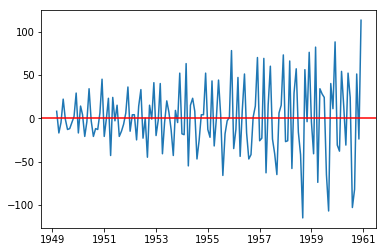

In [14]:
level2_diff=level1_diff.diff()
plt.plot(level2_diff)
plt.axhline(color='r')

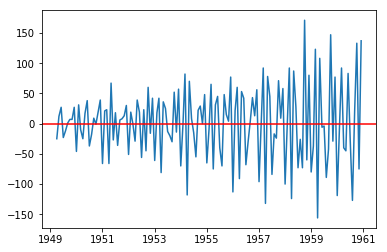

In [15]:
level3_diff=level2_diff.diff()
plt.plot(level3_diff)
plt.axhline(color='r')

In [16]:
ind_airpass_log=np.log(ind_airpass)

In [17]:
diff_log=ind_airpass_log.diff()

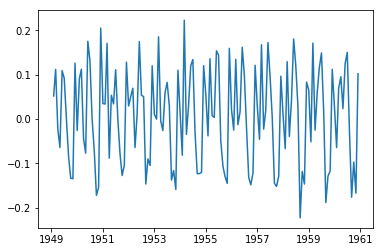

In [18]:
plt.plot(diff_log)

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
adfuller(airpass.Passengers)

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

In [27]:
diff_log=diff_log.dropna()

In [28]:
adfuller(diff_log.Passengers)

(-2.717130598388118,
 0.07112054815086118,
 14,
 128,
 {'1%': -3.4825006939887997,
  '10%': -2.578960197753906,
  '5%': -2.884397984161377},
 -440.35846985568094)

In [29]:
dftest=adfuller(airpass.Passengers)

In [39]:
p_value=dftest[1]

if p_value < 0.05 :
    print("p_value is",p_value)
    print("since p_value is less than 0.05,Null Hypothesis is rejected")
    print("Series is Stationary")
else:
    print("p_value is",p_value)
    print("since p_value is greater than 0.05,We fail to reject the Null Hypothesis")
    print("Data is Non Stationary")

p_value is 0.9918802434376409
since p_value is greater than 0.05,We fail to reject the Null Hypothesis
Data is Non Stationary


In [41]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

In [42]:
ind_airpass_log=np.log(ind_airpass)

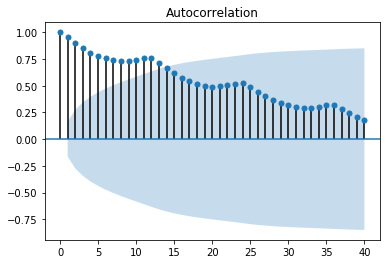

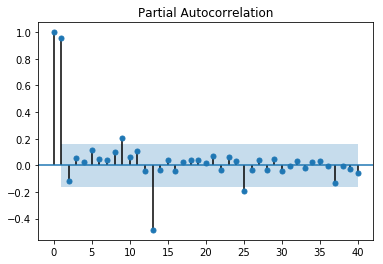

In [45]:
plot_acf(ind_airpass_log.Passengers,lags=40)
plot_pacf(ind_airpass_log.Passengers,lags=40);

In [46]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
model=ARIMA(ind_airpass_log,order=(2,1,0))

In [48]:
result=model.fit()

C:\Users\HP SMART\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\HP SMART\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [49]:
forecast_values=result.forecast(steps=5)

C:\Users\HP SMART\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [50]:
forecast_values

(array([6.13038726, 6.13635264, 6.13606415, 6.14395848, 6.15486149]),
 array([0.10248369, 0.16292524, 0.19923979, 0.2264801 , 0.25095755]),
 array([[5.92952292, 6.3312516 ],
        [5.81702503, 6.45568025],
        [5.74556132, 6.52656697],
        [5.70006565, 6.58785131],
        [5.66299373, 6.64672924]]))